In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading the DataFrame

### Data original

In [19]:
path = './DataGPS/Januari2022.csv'
df = pd.read_csv(path)
df = df.drop({'Unnamed: 0'},axis=1)
df.head()

/tmp/ipykernel_15516/2349169461.py:2: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,maid,latitude,longitude,timestamp
0,8f60c037-8ff2-4ccd-bd6d-05630f92550b,-7.677174,110.45501,1642378184
1,061fd420-fcd0-4923-8a2b-bbeee7c74872,-7.70582,110.31897,1642378196
2,061fd420-fcd0-4923-8a2b-bbeee7c74872,-7.705812,110.31898,1642378196
3,061fd420-fcd0-4923-8a2b-bbeee7c74872,-7.705812,110.31898,1642378220
4,b23130b2-1bdb-4f1d-b8b2-81d3204523c8,-7.84391,110.43813,1642378237


### Data reverse geocoding 

In [38]:
path2 = '../DataTelkomsel/2021November/RGnovember2021.csv'
df2 = pd.read_csv(path2)
df2 = df2.drop({'Unnamed: 0'},axis=1)
df2.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [70]:
# df2.iloc[df2['maid'] == '8f60c037-8ff2-4ccd-bd6d-05630f92550b', [0,1,2,3]]
# df.iloc[df['maid'] == '8f60c037-8ff2-4ccd-bd6d-05630f92550b']

NameError: name 'df' is not defined

In [86]:
df.shape

(22489013, 4)

In [53]:
df2.shape

(45928179, 8)

## Mulai Preprocess

In [3]:
import skmob
from skmob import preprocessing

In [4]:
tdf = skmob.TrajDataFrame.from_file(path2)
print('Number of points in tdf: %d\n' %len(tdf))

Number of points in tdf: 45928179



In [145]:
tdf.head()

   Unnamed: 0                                  maid  latitude   longitude  \
0           0  de1cc960-90fe-46cb-91ae-eb08b27ebc37 -7.800000  110.300003   
1           1  ee52276f-0886-40a1-ab70-b32ba57615a5 -7.830476  110.295151   
2           2  6a1dbe26-eea5-4a6c-8445-13ab396db37d -7.830476  110.295151   
3           3  33ed0b90-7269-461f-ae28-f50599614361 -7.800000  110.300003   
4           4  43e0d958-8833-47c6-a56d-7957fd2ba838 -7.800000  110.300003   

          datetime_wib                              geometry Kelurahan/Desa  \
0  2022-01-01 00:00:00        POINT (110.3000030517578 -7.8)      Balecatur   
1  2022-01-01 00:00:08  POINT (110.2951507568359 -7.8304763)      Balecatur   
2  2022-01-01 00:00:48  POINT (110.2951507568359 -7.8304763)      Balecatur   
3  2022-01-01 00:01:17        POINT (110.3000030517578 -7.8)      Balecatur   
4  2022-01-01 00:01:38        POINT (110.3000030517578 -7.8)      Balecatur   

  Kecamatan Kabupaten  
0   Gamping    Sleman  
1   Gamping   

In [33]:
tdf.info()

<class 'skmob.core.trajectorydataframe.TrajDataFrame'>
RangeIndex: 39570743 entries, 0 to 39570742
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   maid            object 
 2   latitude        float64
 3   longitude       float64
 4   datetime_wib    object 
 5   geometry        object 
 6   Kelurahan/Desa  object 
 7   Kecamatan       object 
 8   Kabupaten       object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.7+ GB


## 1. Filter Unnecessary Area
Membatasi area data point pada range yg dilakukan analisis

In [5]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [6]:
path_jalan = './JaringanJalan/AreaTerban_geojson/clipping_boundary.geojson'
area_shape = gpd.read_file(path_jalan)
area_shape

,geometry
0,"POLYGON ((110.37299 -7.77418, 110.37850 -7.774..."


In [7]:
gdf_gps = GeoDataFrame(tdf, geometry=gpd.points_from_xy(tdf['longitude'], tdf['latitude']))
df2_filter1 = gdf_gps[gdf_gps.geometry.within(area_shape.geometry.iloc[0])]
df2_filter1

,Unnamed: 0,maid,latitude,longitude,datetime_wib,geometry,Kelurahan/Desa,Kecamatan,Kabupaten
526628,526628,beb995f2-542d-4f32-b782-d0347ef15241,-7.774600,110.373009,2021-12-01 04:49:08,POINT (110.37301 -7.77460),Caturtunggal,Depok,Sleman
526629,526629,beb995f2-542d-4f32-b782-d0347ef15241,-7.774600,110.373009,2021-12-01 04:49:08,POINT (110.37301 -7.77460),Caturtunggal,Depok,Sleman
526630,526630,beb995f2-542d-4f32-b782-d0347ef15241,-7.774600,110.373010,2021-12-01 04:49:08,POINT (110.37301 -7.77460),Caturtunggal,Depok,Sleman
526631,526631,beb995f2-542d-4f32-b782-d0347ef15241,-7.774600,110.373010,2021-12-01 04:49:08,POINT (110.37301 -7.77460),Caturtunggal,Depok,Sleman
526632,526632,beb995f2-542d-4f32-b782-d0347ef15241,-7.774600,110.373016,2021-12-01 04:49:08,POINT (110.37302 -7.77460),Caturtunggal,Depok,Sleman
...,...,...,...,...,...,...,...,...,...
35686678,35686678,ff3edcd7-4fc8-4f61-8e06-4b0e8405211e,-7.788023,110.377090,2021-12-31 23:57:20,POINT (110.37709 -7.78802),Kelurahan Kotabaru,Gondokusuman,Kota Yogyakarta
35686679,35686679,1e766daa-5912-47af-b45f-24487ba48eff,-7.788023,110.377090,2021-12-31 23:57:48,POINT (110.37709 -7.78802),Kelurahan Kotabaru,Gondokusuman,Kota Yogyakarta
35686680,35686680,ff3edcd7-4fc8-4f61-8e06-4b0e8405211e,-7.788023,110.377090,2021-12-31 23:58:21,POINT (110.37709 -7.78802),Kelurahan Kotabaru,Gondokusuman,Kota Yogyakarta
35686681,35686681,1e766daa-5912-47af-b45f-24487ba48eff,-7.788023,110.377090,2021-12-31 23:58:31,POINT (110.37709 -7.78802),Kelurahan Kotabaru,Gondokusuman,Kota Yogyakarta


In [62]:
#menambahkan kolom tanggal untuk membedakan hari
df2_filter1['datetime_wib'] = pd.to_datetime(df2_filter1['datetime_wib'])
df2_filter1['tanggal'] = df2_filter1['datetime_wib'].dt.date

In [63]:
df2_filter1.to_csv('df2_filter1_des.csv', index=False)

## 2. Lihat persebaran data

In [46]:
def bar_chart(data):
    filtered_data = data.copy()

    # Hapus duplikat 'maid' berdasarkan tanggal
    filtered_data_unique_maid = filtered_data.drop_duplicates(subset=['tanggal', 'maid'])

    # Hitung jumlah unik per hari
    jumlah_unik_per_hari = filtered_data_unique_maid.groupby('tanggal').size()

    # Plotting
    plt.figure(figsize=(10, 6))
    jumlah_unik_per_hari.plot(kind='bar', color='skyblue')
    plt.title('Jumlah Data Maid unik per Hari')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Data Unik')
    plt.xticks(rotation=75)
    plt.show()

In [32]:
def count_maid(data):
    filtered_data = data.copy()
    
    # Ganti 'datetime_wib' sesuai nama kolom datetime di data-mu
    filtered_data['datetime_wib'] = pd.to_datetime(filtered_data['datetime_wib'])
    filtered_data['tanggal'] = filtered_data['datetime_wib'].dt.date

    # Hitung jumlah 'maid' unik per hari
    jumlah_maid_unik_per_hari = filtered_data.groupby('tanggal')['maid'].nunique()

    # Print hasilnya
    print(jumlah_maid_unik_per_hari)


In [33]:
def count_bykelurahan(data):
    filtered_data = data.copy()

    # Hitung jumlah 'maid' unik per hari
    jumlah_maid_unik = filtered_data.groupby('Kelurahan/Desa')['maid'].nunique()

    # Print hasilnya
    print(jumlah_maid_unik)


### Januari 2022

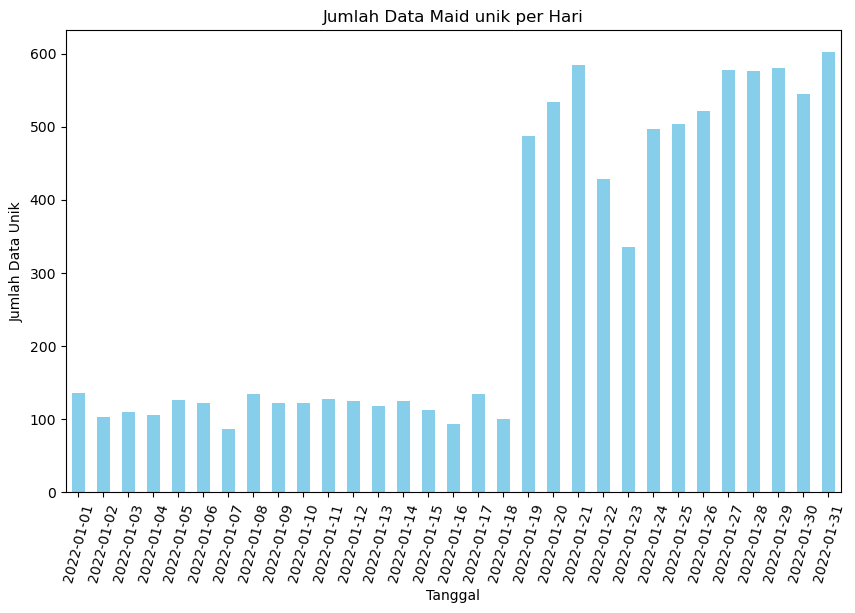

In [54]:
path = 'df2_filter1_jan.csv'
df2_filter1 = pd.read_csv(path)
df2_filter1 = df2_filter1.drop({'Unnamed: 0'},axis=1)
bar_chart(df2_filter1)

In [56]:
df2_filter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96729 entries, 0 to 96728
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   maid            96729 non-null  object 
 1   latitude        96729 non-null  float64
 2   longitude       96729 non-null  float64
 3   datetime_wib    96729 non-null  object 
 4   geometry        96729 non-null  object 
 5   Kelurahan/Desa  96729 non-null  object 
 6   Kecamatan       96729 non-null  object 
 7   Kabupaten       96729 non-null  object 
 8   tanggal         96729 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.6+ MB


### Februari 2022

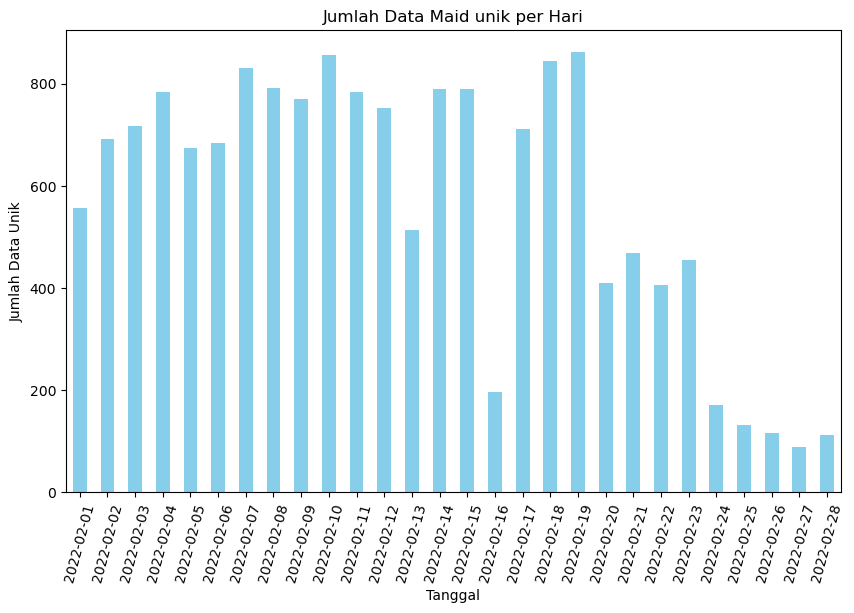

In [60]:
path = 'df2_filter1_feb.csv'
df2_filter1 = pd.read_csv(path)
df2_filter1 = df2_filter1.drop({'Unnamed: 0'},axis=1)
bar_chart(df2_filter1)

In [61]:
df2_filter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244850 entries, 0 to 244849
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   maid            244850 non-null  object 
 1   latitude        244850 non-null  float64
 2   longitude       244850 non-null  float64
 3   datetime_wib    244850 non-null  object 
 4   geometry        244850 non-null  object 
 5   Kelurahan/Desa  244850 non-null  object 
 6   Kecamatan       244850 non-null  object 
 7   Kabupaten       244850 non-null  object 
 8   tanggal         244850 non-null  object 
dtypes: float64(2), object(7)
memory usage: 16.8+ MB


### Desember 2021

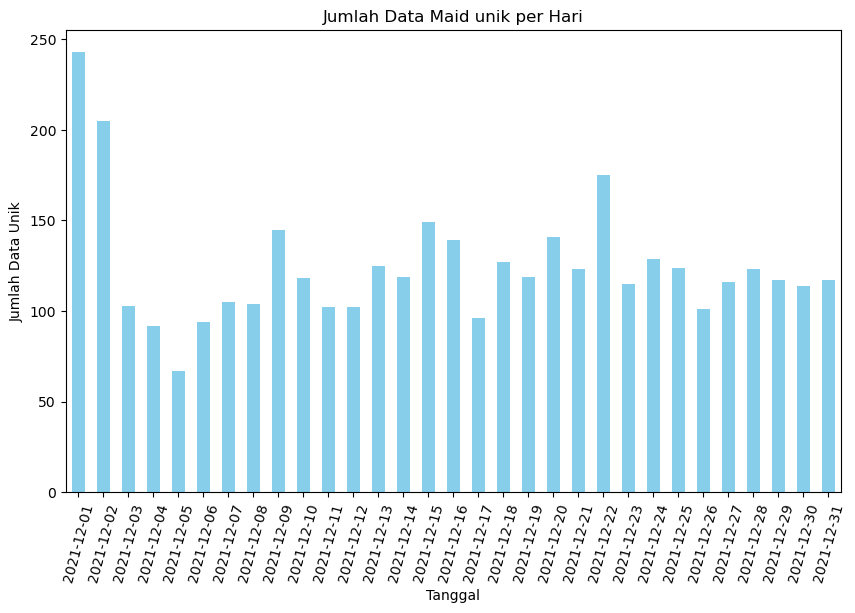

In [65]:
path = 'df2_filter1_des.csv'
df2_filter1 = pd.read_csv(path)
df2_filter1 = df2_filter1.drop({'Unnamed: 0'},axis=1)
bar_chart(df2_filter1)

In [66]:
df2_filter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111775 entries, 0 to 111774
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   maid            111775 non-null  object 
 1   latitude        111775 non-null  float64
 2   longitude       111775 non-null  float64
 3   datetime_wib    111775 non-null  object 
 4   geometry        111775 non-null  object 
 5   Kelurahan/Desa  111775 non-null  object 
 6   Kecamatan       111775 non-null  object 
 7   Kabupaten       111775 non-null  object 
 8   tanggal         111775 non-null  object 
dtypes: float64(2), object(7)
memory usage: 7.7+ MB


### November 2021

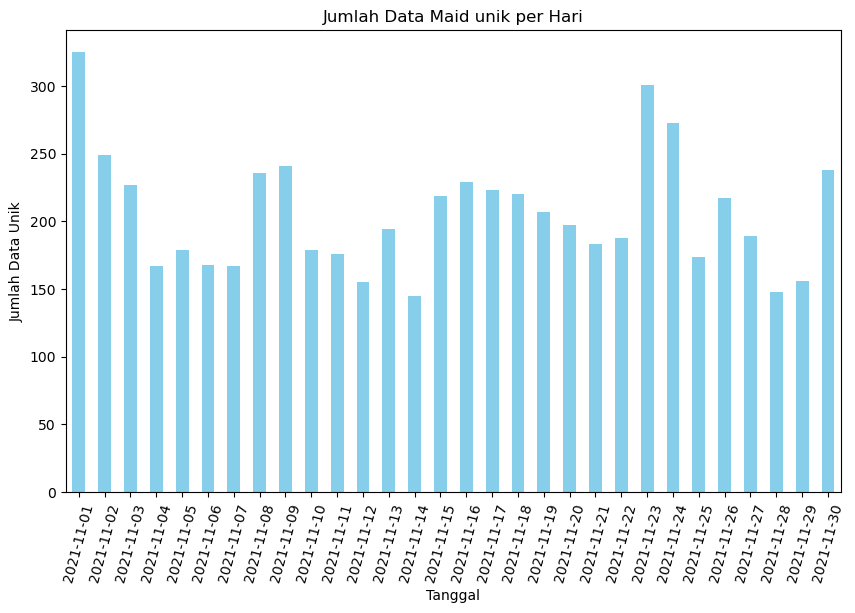

In [67]:
path = 'df2_filter1_nov.csv'
df2_filter1 = pd.read_csv(path)
df2_filter1 = df2_filter1.drop({'Unnamed: 0.1'},axis=1)
bar_chart(df2_filter1)

In [68]:
count_bykelurahan(df2_filter1)

Kelurahan/Desa
Caturtunggal           309
Kelurahan Kotabaru    2132
Kelurahan Terban      1867
Name: maid, dtype: int64


In [69]:
df2_filter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527286 entries, 0 to 527285
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   maid            527286 non-null  object 
 1   latitude        527286 non-null  float64
 2   longitude       527286 non-null  float64
 3   datetime_wib    527286 non-null  object 
 4   geometry        527286 non-null  object 
 5   Kelurahan/Desa  527286 non-null  object 
 6   Kecamatan       527286 non-null  object 
 7   Kabupaten       527286 non-null  object 
 8   tanggal         527286 non-null  object 
dtypes: float64(2), object(7)
memory usage: 36.2+ MB
